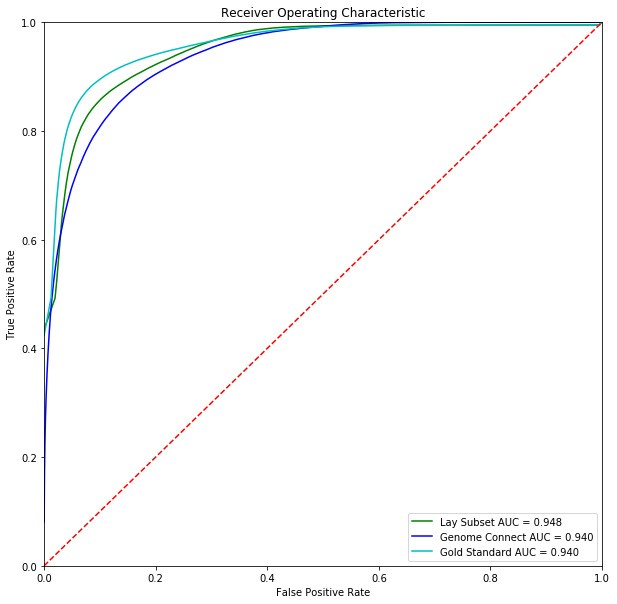

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

gc_fpr = []
gc_tpr = []
lay_fpr = []
lay_tpr = []
gold_fpr = []
gold_tpr = []

with open('../data/gc-confusion.tsv', 'r') as gc_confusion_matrix:
    for line in gc_confusion_matrix:
        rank, true_pos, false_pos, false_neg, true_neg = line.rstrip("\n").split("\t")

        gc_fpr.append( int(false_pos) / (int(false_pos) + int(true_neg)) )
        gc_tpr.append( int(true_pos) / (int(true_pos) + int(false_neg)) )
        
with open('../data/lay-confusion.tsv', 'r') as lay_confusion_matrix:
    for line in lay_confusion_matrix:
        rank, true_pos, false_pos, false_neg, true_neg = line.rstrip("\n").split("\t")

        lay_fpr.append( int(false_pos) / (int(false_pos) + int(true_neg)) )
        lay_tpr.append( int(true_pos) / (int(true_pos) + int(false_neg)) )
        
with open('../data/gold-confusion.tsv', 'r') as gold_confusion_matrix:
    for line in gold_confusion_matrix:
        rank, true_pos, false_pos, false_neg, true_neg = line.rstrip("\n").split("\t")

        gold_fpr.append( int(false_pos) / (int(false_pos) + int(true_neg)) )
        gold_tpr.append( int(true_pos) / (int(true_pos) + int(false_neg)) )

gc_auc = auc(gc_fpr, gc_tpr)
lay_auc = auc(lay_fpr, lay_tpr)
gold_auc = auc(gold_fpr, gold_tpr)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(lay_fpr, lay_tpr, 'g', label = 'Lay Subset AUC = %0.3f' % lay_auc)
plt.plot(gc_fpr, gc_tpr, 'b', label = 'Genome Connect AUC = %0.3f' % gc_auc)
plt.plot(gold_fpr, gold_tpr, 'c', label = 'Gold Standard AUC = %0.3f' % gc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()